# Problem set 5

- Below are the functions necessary to complete problem set 5
- We will use an internal data set that is available in r-studio

## A.1 Import packages

In [1]:
library(dplyr) #Data manipulation


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# 1. 

## 1.1 Create table

- PS5 corresponding problem 1.a


In [2]:
n = 164+160

#Change x number to get answer for your assignment
x = n-20-10 #-NUMBER #-NUMBER

p = x/n

In [3]:
table_1 = cbind(x,n,p)
table_1

x,n,p
294,324,0.9074074


## 1.2 Standard error calculation
- PS5 corresponding problem 1.b

$$SE_{\hat{p}}= \sqrt{\frac{p(1-p)}{n}}$$

In [4]:
answer_function_12 = function(sampling_proportion, n){
    step_1 = sampling_proportion*(1-sampling_proportion)
    step_2 = step_1/n
    step_3 = sqrt(step_2)
    
    return (step_3)
}

In [5]:
standard_error = answer_function_12(p, n)
standard_error 

[1] 0.01610337

## 1.3 Create 95% CI interval

- PS5 corresponding problem 1.c

$$\hat{p}\pm z_{\alpha/2}SE_{\hat{p}}$$

In [6]:
answer_function_13 = function(sampling_proportion, z, std_error){
    
    rhs = z*std_error
    
    conf_lower = p-rhs
    conf_upper = p+rhs
    
    print(paste('p +-', round(z,3),'*',round(std_error,3), sep=''))
    print(paste('Upper bound: ', conf_upper, ' Lower bound: ', conf_lower, sep=''))
}

In [7]:
#Change z number to get answer for your assignment
z = 1.5


answer_function_13(p, z, standard_error)

[1] "p +-1.5*0.016"
[1] "Upper bound: 0.931562462719905 Lower bound: 0.88325235209491"


## 1.4 Create 95% CI interval

- PS5 corresponding problem 1.d

In [8]:
prop.test(x,n, p=.25, correct=F)


	1-sample proportions test without continuity correction

data:  x out of n, null probability 0.25
X-squared = 746.81, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.25
95 percent confidence interval:
 0.8708960 0.9343713
sample estimates:
        p 
0.9074074 


# 2. 

## 2.1 Table
- PS5 corresponding problem 2.a

In [9]:
table_21 = matrix(nrow=2, ncol=3, c(68,164,128,204,173,165))
table_21

68,128,173
164,204,165


## 2.2 Chi-square expected values
- PS5 corresponding problem 2.c


- chisq.test function [info](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/chisq.test)
    - chisq.test()$expected
        - the expected counts under the null hypothesis.




### 2.2.1 chisq function

In [10]:
chisq.test(table_21 , correct=F)$expected

94.90909,135.8182,138.2727
137.09091,196.1818,199.7273


### 2.2.2 by hand (OPTIONAL)

$$\frac{\text{Row_total}*\text{column_total}}{\text{total_obs}}$$

In [11]:
table_21_full = as_tibble(table_21)  %>% mutate(total= rowSums(.))
table_21_full = rbind(table_21_full, colSums(table_21_full))
table_21_full

Warning message:
“`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session.”

V1,V2,V3,total
68,128,173,369
164,204,165,533
232,332,338,902


#### 2.2.2.1 Calculate with sums (3rd row & 4th column)

In [12]:
#3rd row
col_sums = table_21_full[3,1:3]
col_sums

V1,V2,V3
232,332,338


In [13]:
#4th column
row_sums_1 = as.numeric(table_21_full[1,4])
row_sums_2 = as.numeric(table_21_full[2,4])
print(row_sums_1)
print(row_sums_2)

[1] 369
[1] 533


In [14]:
col_sums*row_sums_1/902

V1,V2,V3
94.90909,135.8182,138.2727


In [15]:
col_sums*row_sums_2/902

V1,V2,V3
137.0909,196.1818,199.7273


## 2.3 Chi-square test for null that age provides information about the approval for stop and frisk

In [16]:
chisq.test(table_21 , correct=F)


	Pearson's Chi-squared test

data:  table_21
X-squared = 28.433, df = 2, p-value = 6.697e-07


# 3. Chi square

## 3.1 
- PS5 corresponding problem 3.b
    - Similar to 2.2.1 

In [17]:
#fridays = c()

In [18]:
#chisq.test(fridays, correct=F)$expected

## 3.2

PS5 corresponding problem 3.c
   - Similar to 2.3

In [19]:
#probabilities = #c(#,#,#)
#chisq.test(fridays, correct=F, p=probabilities)

# 4. Regression (OPTIONAL)
- [Data](https://ideas.repec.org/p/boc/bocins/bwght.html)

## 4.1 Download data

In [20]:
library(foreign)

In [21]:
url = 'http://fmwww.bc.edu/ec-p/data/wooldridge/bwght.dta'
#url = 'http://fmwww.bc.edu/ec-p/data/wooldridge/bwght2.dta'
df_birth = read.dta(url)

In [22]:
df_birth %>% head(2)

faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
13.5,16.5,122.3,109,12,12,1,1,1,0,4.691348,6.8125,0,2.602690
7.5,16.5,122.3,133,6,12,2,1,0,0,4.890349,8.3125,0,2.014903


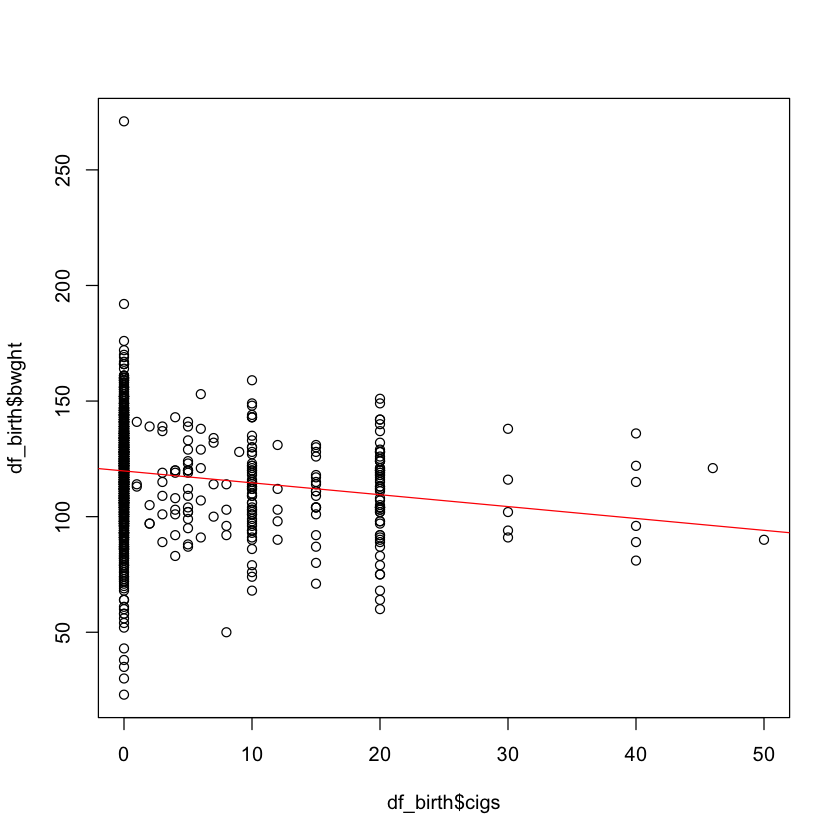

In [23]:
plot(df_birth$cigs, df_birth$bwght)
abline(lm(bwght~cigs, data=df_birth), col="red")

## 4.2 Regression
- lm function

In [24]:
lm(bwght~ cigs, data= df_birth)


Call:
lm(formula = bwght ~ cigs, data = df_birth)

Coefficients:
(Intercept)         cigs  
   119.7719      -0.5138  


### 4.2.1 Coefficients

In [25]:
coefs = lm(bwght~ cigs, data= df_birth)$coefficients
coefs 

(Intercept)        cigs 
119.7719004  -0.5137721

## 4.3 Calculate expected weight given smoked cigs a day
PS5 corresponding problem 4.d


In [26]:
beta0 = coefs[c(1)] %>% as.double()
beta0 

[1] 119.7719

In [27]:
beta1 =coefs[c(2)] %>% as.double()
beta1 

[1] -0.5137721

In [28]:
cigs_day = 10
beta0 + cigs_day*beta1 

[1] 114.6342

### 4.3.1 Input data 

In [29]:
var = readline(prompt = "Enter number of cigs smoked a day : "); 
  
# convert the inputted value to an integer 
var1 = beta0 + beta1*as.integer(var)
  
# print the value 
print(paste('Smoking ', var, ' cigs/day, we expect a child to be ', round(var1,3), ' ounces', sep=''))

Enter number of cigs smoked a day : 10
[1] "Smoking 10 cigs/day, we expect a child to be 114.634 ounces"
